In [1]:
import numpy as np
import pandas as pd
from copy import copy
import sys
sys.path.append('/home/ndsviriden/MinMax94/src/utils') 
from constants import data_directory, MmxColumns
from interpolation import interpolate_mmx, create_patterns
from converters import convert_raw_to_mmx
from loaders import load_mm94_stations, select_mm94_features
from geographical import find_nearest_wmo_station, add_solar_angles, add_coordinates, add_road_id
import gc
from tqdm import tqdm_notebook
from functools import reduce

## Loading data

In [2]:
%%time
test_station_id = [114, 117, 119, 302, 303, 307, 393, 442, 503, 504, 
                   511, 516, 1896, #1838 
                   1921, 628]


train_station_id = [113, 115, 116, 118, 126, 150, 152, 200, 223, 228, 
                    239, 305, 308, 309, 401, 411, 432, 435, 454, 456, 
                    593, 1831, 1838, 1899, 1911, 4007, 20323, 20717, 20743, 
                    20754, 20755, 20761, 20916, 20921]


generate_station_id = [615, 618, 620, 624, 626, 627, 635, 702, 
                       704, 862, 874, 888, 1808, 1813, 1826]

raw = load_mm94_stations(train_station_id + test_station_id + generate_station_id)
raw = select_mm94_features(raw, ['t_air', 't_road', 't_underroad', 'pressure', 'dampness'])

mmx_rwis = convert_raw_to_mmx(raw)
mmx_rwis_interpolated = interpolate_mmx(mmx_rwis, interpol_freq=20)
data = create_patterns(mmx_rwis_interpolated)

data['data_solar_azimuth'], data['data_solar_altitude'] = add_solar_angles(data)
data['data_latitude'], data['data_longitude'] = add_coordinates(data)
data['data_road'] = add_road_id(data)
data = data.dropna(subset=('data_t_underroad', ))

del data[MmxColumns.ID_AIR_TEMPERATURE], \
    data[MmxColumns.ID_PRESSURE], data[MmxColumns.ID_HUMIDITY], data[MmxColumns.ID_ROAD_TEMPERATURE]

train = data[data['station_id'].isin(train_station_id)]
train = train.reset_index(drop=True)

test = data[data['station_id'].isin(test_station_id)]
test = test.reset_index(drop=True)

generated = data[data['station_id'].isin(generate_station_id)]
generated = generated.reset_index(drop=True)

del data, raw, mmx_rwis, mmx_rwis_interpolated
gc.collect()

/home/ndsviriden/MinMax94/src/utils/geographical.py:65: RuntimeWarning: invalid value encountered in arccos
  solar_azimuth = np.arccos(cos_az) * np.sign(h_rad)


CPU times: user 2min 12s, sys: 14.5 s, total: 2min 26s
Wall time: 2min 26s


In [3]:
train

,date_time_utc,data_pressure,data_dampness,data_t_underroad,id_t_underroad,data_t_air,date_time,data_t_road,station_id,data_solar_azimuth,data_solar_altitude,data_latitude,data_longitude,data_road
0,2012-09-18 08:40:00,739.204839,68.824194,18.017742,117040741.0,15.309677,2012-09-18 11:40:00,18.616129,113,1.050638,0.353551,54.447,53.603,54
1,2012-09-18 09:00:00,739.270968,68.554839,18.093548,117040741.0,15.341935,2012-09-18 12:00:00,18.703226,113,1.129714,0.308565,54.447,53.603,54
2,2012-09-18 09:20:00,739.337097,68.285484,18.169355,117040741.0,15.374194,2012-09-18 12:20:00,18.790323,113,1.206558,0.261889,54.447,53.603,54
3,2012-09-18 09:40:00,739.403226,68.016129,18.245161,117040741.0,15.406452,2012-09-18 12:40:00,18.877419,113,1.281520,0.213842,54.447,53.603,54
4,2012-09-18 10:00:00,739.469355,67.746774,18.320968,117040741.0,15.438710,2012-09-18 13:00:00,18.964516,113,1.354963,0.164719,54.447,53.603,54
5,2012-09-18 10:20:00,739.535484,67.477419,18.396774,117040741.0,15.470968,2012-09-18 13:20:00,19.051613,113,1.427252,0.114805,54.447,53.603,54
6,2012-09-18 10:40:00,739.601613,67.208065,18.472581,117040741.0,15.503226,2012-09-18 13:40:00,19.138710,113,1.498755,0.064368,54.447,53.603,54
7,2012-09-18 11:00:00,739.667742,66.938710,18.548387,117040741.0,15.535484,2012-09-18 14:00:00,19.225806,113,1.569841,0.013671,54.447,53.603,54
8,2012-09-18 11:20:00,739.733871,66.669355,18.624194,117040741.0,15.567742,2012-09-18 14:20:00,19.312903,113,1.640875,-0.037030,54.447,53.603,54
9,2012-09-18 11:40:00,739.800000,66.100000,18.700000,117040741.0,15.616667,2012-09-18 14:40:00,19.500000,113,1.712222,-0.087477,54.447,53.603,54


## Feature selection

In [6]:
from preprocessing import create_feature_df
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from functools import partial

In [7]:
point = pd.Timestamp(2015, 6, 1)

params_df = {}  
params_df['target'] = 'data_t_underroad'
params_df['variables'] = ['data_t_air', 'data_t_road', 'data_t_underroad', 
                          'data_pressure', 'data_dampness']
params_df['interpol_freq'] = 20
params_df['lag_list'] = (1, 2, 3, 4, 5, 6, 7, 8)
params_df['diff_list'] = ((1, 2), (2, 3), (3, 4), (4, 5), (5, 6))
params_df['coordinates'] = True
params_df['solar_angles'] = True
params_df['road_id'] = False
params_df['day_of_year'] = True
params_df['month'] = False
params_df['hour'] = True
params_df['post_process'] = False

df_train = create_feature_df(train[train['date_time_utc'] < point], **params_df)
df_valid = create_feature_df(train[train['date_time_utc'] >= point], **params_df)
df_test = create_feature_df(test, **params_df)

In [ ]:
main_cols = ('data_t_road', 'data_t_air', 'data_t_underroad', 'data_pressure', 'data_dampness')
features = [col for col in df_train if col.startswith('data_')]
features = [col for col in features if col not in (main_cols)]
target = [col for col in df_train if col.startswith('target_')][0]

X_train = np.array(df_train[features].values)
y_train = np.array(df_train[target].values)

X_valid = np.array(df_valid[features].values)
y_valid = np.array(df_valid[target].values)

X_test = np.array(df_test[features].values)
y_test = np.array(df_test[target].values)

lgb_train = lgb.Dataset(X_train, y_train, feature_name=features)
lgb_val = lgb.Dataset(X_valid, y_valid, reference=lgb_train, feature_name=features)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train, feature_name=features)

## Train model

In [ ]:
df = df_train

baseline_mse = mean_squared_error(df.data_t_underroad_lag_20, df.target_t_underroad)
baseline_mae = mean_absolute_error(df.data_t_underroad_lag_20, df.target_t_underroad)

print('MAE: {0: .2f} \nMSE: {1: .2f}'.format(baseline_mae, baseline_mse))

In [ ]:
#	train's l1: 0.114561	valid's l1: 0.117564	test's l1: 0.129071

In [ ]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.75,
    'bagging_fraction': 0.5,
    'bagging_freq': 5,
    #'lambda_l1': 1.0,
    #'lambda_l2': 2.0,
    'verbose': 0
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=(lgb_train, lgb_val, lgb_test),
                valid_names=('train', 'valid', 'test'),
                verbose_eval=200,)

In [ ]:
z = list(zip(features, list(gbm.feature_importance())))
z.sort(key=lambda item: item[1], reverse=True)
z[:5]

## Save Model

import pickle

f = open('/mnt/HARD/MinMax94/models/anomaly_detection/detector_t_underroad.pickle','wb')                                                                                                                                                                                                                                                           
pickle.dump(gbm,f)                                                                                                                                                                                                                                                                        
f.close()

## Select Threshold

### Generate anomalies

In [ ]:
from score import calc_precision, calc_recall, calc_f1_score
from generate_anomalies import generate_single_anomaly, generate_short_term_anomaly, generate_long_term_anomaly

np.random.seed(42)
to_generate = copy(generated)
to_generate['label_true'] = False
col = MmxColumns.UNDERGROUND_TEMPERATURE

#---------------------------------------------------------------------------------
number_of_anomalies = 30 * len(generate_station_id)
index_list = np.random.choice(to_generate.index, number_of_anomalies, replace=False)

for index in index_list:
    perturbated_series = generate_single_anomaly(to_generate, index)
    to_generate.loc[index, col] += perturbated_series
    to_generate.loc[index, 'label_true'] = True
    
#---------------------------------------------------------------------------------
number_of_anomalies = 20 * len(generate_station_id)
index_list = np.random.choice(to_generate.index, number_of_anomalies, replace=False)

for index in index_list:
    perturbated_series = generate_short_term_anomaly(to_generate, index)
    series_duration = len(perturbated_series)
    to_generate.loc[index: (index + series_duration - 1), col] += perturbated_series
    to_generate.loc[index: (index + series_duration - 1), 'label_true'] = True

#---------------------------------------------------------------------------------
number_of_anomalies = 3 * len(generate_station_id)
index_list = np.random.choice(to_generate.index, number_of_anomalies, replace=False)

for index in index_list:
    perturbated_series = generate_long_term_anomaly(to_generate, index)
    series_duration = len(perturbated_series)
    to_generate.loc[index: (index + series_duration - 1), col] += perturbated_series
    to_generate.loc[index: (index + series_duration - 1), 'label_true'] = True

### Obtain anomaly scores

In [12]:
df_generate = create_feature_df(to_generate, **params_df)

X_generate = np.array(df_generate[features].values)
y_generate = np.array(df_generate[target].values)
lgb_generate = lgb.Dataset(X_generate, y_generate, reference=lgb_train, feature_name=features)
y_gen_pred = gbm.predict(X_generate)

df = copy(df_generate[['label_true', 'station_id', 'date_time_utc', 'target_t_underroad']])
df['decision_function'] = np.abs(y_gen_pred - y_generate)

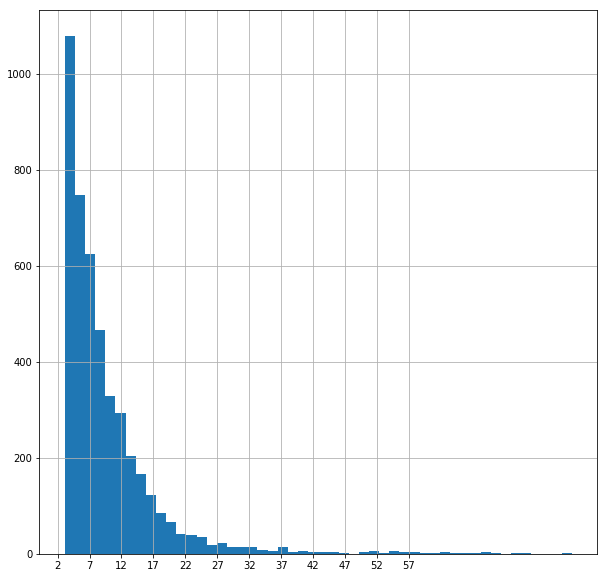

In [13]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))
hist = df['decision_function'].nlargest(len(df) // 200)
plt.hist(hist, bins=50)
plt.grid()
plt.xticks(np.arange(2, 60, 5))
plt.show()

### Select optimal threshold

In [14]:
st_id = generate_station_id
window = pd.Timedelta('2h')
generated_results = []

for thresh in np.arange(2, 10, 0.2):
    df['label_predict'] = df['decision_function'] > thresh
        
    recall = calc_recall(df, st_id, window)
    precision = calc_precision(df, st_id, window)
    f1 = calc_f1_score(precision, recall)
    
    generated_results.append({'Threshold': thresh, 'F1': f1 ,'Recall': recall, 'Precision': precision,})
    print("Threshhold: {0:.3f} -- {1:.3f}, {2:.3f}, {3:.3f}".format(thresh, f1, recall, precision))
    

Threshhold: 2.000 -- 0.899, 0.996, 0.819
Threshhold: 2.200 -- 0.912, 0.995, 0.843
Threshhold: 2.400 -- 0.922, 0.994, 0.859
Threshhold: 2.600 -- 0.929, 0.994, 0.872
Threshhold: 2.800 -- 0.937, 0.992, 0.889
Threshhold: 3.000 -- 0.943, 0.991, 0.899
Threshhold: 3.200 -- 0.948, 0.990, 0.909
Threshhold: 3.400 -- 0.951, 0.988, 0.916
Threshhold: 3.600 -- 0.955, 0.987, 0.924
Threshhold: 3.800 -- 0.958, 0.986, 0.932
Threshhold: 4.000 -- 0.960, 0.983, 0.937
Threshhold: 4.200 -- 0.960, 0.980, 0.940
Threshhold: 4.400 -- 0.960, 0.979, 0.942
Threshhold: 4.600 -- 0.959, 0.976, 0.943
Threshhold: 4.800 -- 0.958, 0.972, 0.944
Threshhold: 5.000 -- 0.956, 0.967, 0.946
Threshhold: 5.200 -- 0.954, 0.962, 0.946
Threshhold: 5.400 -- 0.955, 0.960, 0.949
Threshhold: 5.600 -- 0.955, 0.959, 0.950
Threshhold: 5.800 -- 0.955, 0.956, 0.954
Threshhold: 6.000 -- 0.955, 0.954, 0.957
Threshhold: 6.200 -- 0.955, 0.949, 0.960
Threshhold: 6.400 -- 0.955, 0.948, 0.962
Threshhold: 6.600 -- 0.956, 0.948, 0.964
Threshhold: 6.80

## Predict values

In [1]:
y_pred = gbm.predict(X_test)
y_train_pred = gbm.predict(X_train)

NameError: name 'gbm' is not defined

## Decision Function

In [72]:
threshold = 2.7
df_train['predict_t_underroad'] = y_train_pred
df_train['label_predict'] = np.abs(y_train - y_train_pred) > threshold
num_of_outliers = len(df_train[df_train['label_predict']])
percentage = num_of_outliers / len(df_train)
print("Ratio of anomalies is {0:.5f}% ({1} out of {2})".format(percentage, num_of_outliers, len(df_train)))
print(df_train.groupby('station_id')['label_predict'].sum())

Ratio of anomalies is 0.00022% (355 out of 1605928)
station_id
113       5.0
115       2.0
116       2.0
118      27.0
126       8.0
150       3.0
152       1.0
200       3.0
223      17.0
228      25.0
239      14.0
305       5.0
308       3.0
309      71.0
401      12.0
411       8.0
432      16.0
435       8.0
454      26.0
456      38.0
593       8.0
1831     16.0
1838      3.0
1899      4.0
1911      7.0
4007      5.0
20323     1.0
20717     5.0
20743     2.0
20754     1.0
20755     0.0
20761     3.0
20916     5.0
20921     1.0
Name: label_predict, dtype: float64


In [67]:
threshold = 2.7
df_test['predict_t_underroad'] = y_pred
df_test['label_predict'] = np.abs(y_test - y_pred) > threshold
num_of_outliers = len(df_test[df_test['label_predict']])
percentage = num_of_outliers / len(df_test)
print("Ratio of anomalies is {0:.5f}% ({1} out of {2})".format(percentage, num_of_outliers, len(df_test)))
print(df_test.groupby('station_id')['label_predict'].sum())

Ratio of anomalies is 0.00194% (1892 out of 972876)
station_id
114      20.0
117     646.0
119       8.0
302      15.0
303      30.0
307      38.0
393      17.0
442      18.0
503      11.0
504      20.0
511      13.0
516      40.0
628     983.0
1896     16.0
1921     17.0
Name: label_predict, dtype: float64


## Plot result

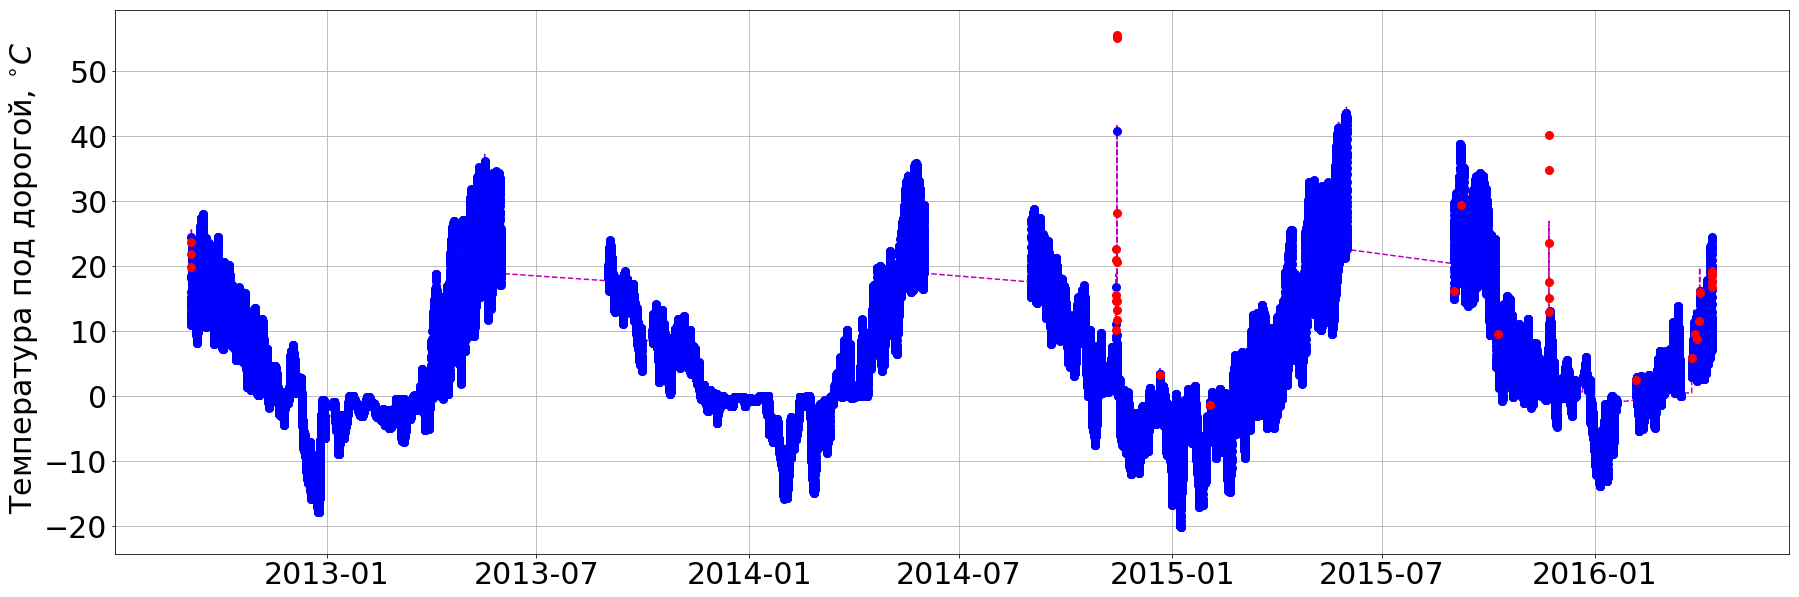

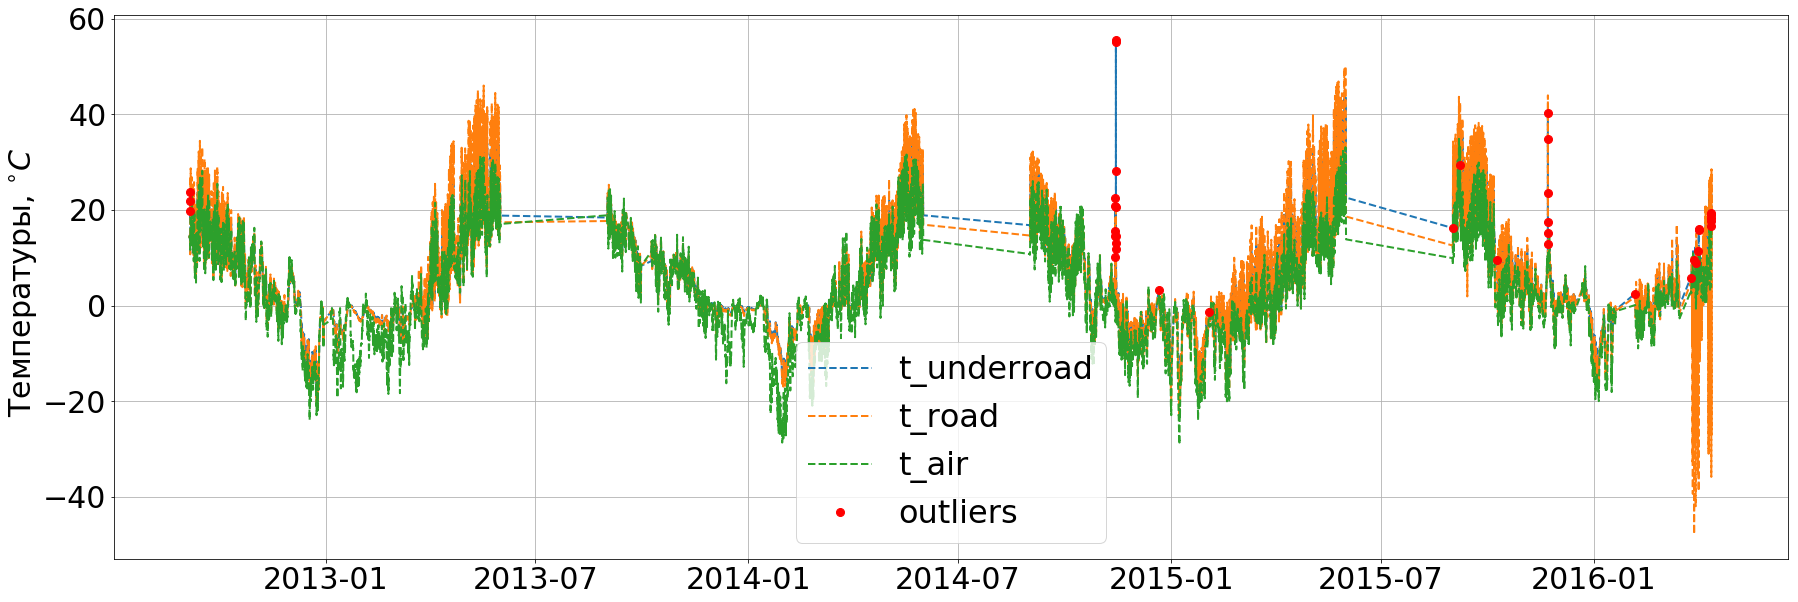

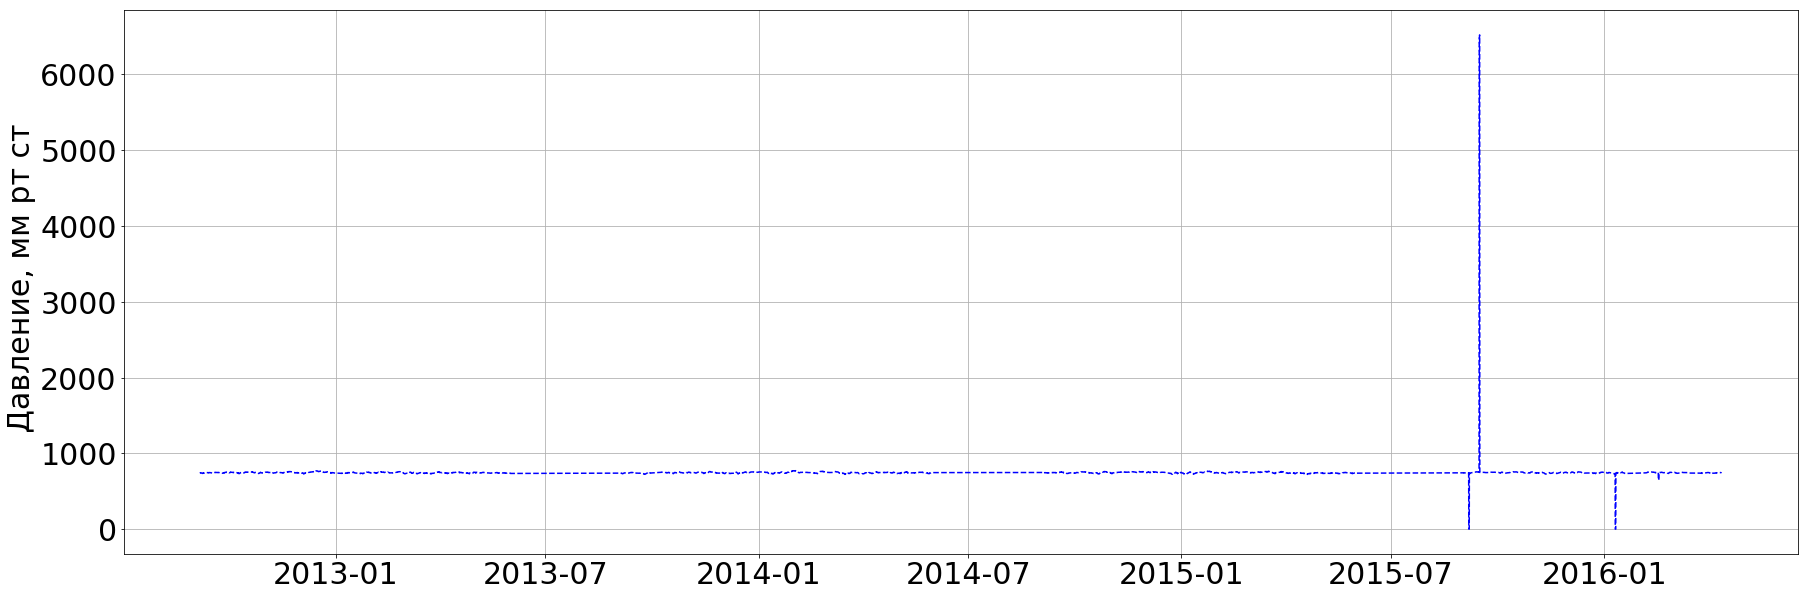

In [71]:
import matplotlib.pyplot as plt

#####-----------------------------STATION_ID-------------------------------#####
z = copy(df_test[df_test['station_id']==307].set_index('date_time_utc'))
#z = copy(df_train[df_train['station_id']==456].set_index('date_time_utc'))

#####-----------------------------TIME_INTERVAL-------------------------------#####
start = pd.Timestamp(2012, 3, 1)
end = pd.Timestamp(2017, 4, 1)
to_plot = z[(z.index<=end) & (z.index>=start)]

#####-----------------------------T_AIR-------------------------------#####
plt.figure(figsize=(30, 10))

plt.plot_date(to_plot.index, to_plot['predict_t_underroad'], 'm',
                      linestyle='--', marker='None', markersize=8, label='predicted T_air')

for elem in [True, False]:
    cond_predict = (to_plot['label_predict'] == 0) == elem
    
    if elem:
        plt.plot_date(to_plot[cond_predict].index, to_plot[cond_predict]['target_t_underroad'], 'b',
                      linestyle='none', marker='o', markersize=8, label='true T_air')
    else:        
        plt.plot_date(to_plot[cond_predict].index, to_plot[cond_predict]['target_t_underroad'], 'r.',
                              linestyle='none', marker='o', label='outliers', markersize=8)

plt.grid()
#plt.legend(fontsize=32)
#plt.ylim((720, 780))
plt.ylabel(r' Температура под дорогой, $^{\circ}C$', fontsize=30)

plt.tick_params(labelsize=30)


#####-----------------------------TEMPERATURE-------------------------------#####
plt.figure(figsize=(30, 10))

for elem in [True, False]:
    cond_predict = (to_plot['label_predict'] == 0) == elem
    
    if elem:
        plt.plot_date(to_plot.index, to_plot['target_t_underroad'],
                      linestyle='--', linewidth=2, marker='None', markersize=8, label='t_underroad')
        
        plt.plot_date(to_plot.index, to_plot['data_t_road'],
                      linestyle='--', linewidth=2, marker='None', markersize=8, label='t_road')
        
        plt.plot_date(to_plot.index, to_plot['data_t_air'],
                      linestyle='--', linewidth=2, marker='None', markersize=8, label='t_air')
        
    else:        
        plt.plot_date(to_plot[cond_predict].index, to_plot[cond_predict]['target_t_underroad'], 'r.',
                              linestyle='none', marker='o', label='outliers', markersize=8)

plt.grid()
plt.legend(fontsize=32)
plt.ylabel(r' Температуры, $^{\circ}C$', fontsize=30)

plt.tick_params(labelsize=30)

#####-----------------------------PRESSURE-------------------------------#####
plt.figure(figsize=(30, 10))

plt.plot_date(to_plot.index, to_plot['data_pressure'], 'b',
                      linestyle='--', marker='None', markersize=8, label='pressure')


plt.grid()
#plt.legend(fontsize=32)
#plt.ylim((720, 780))
plt.ylabel(r' Давление, мм рт ст', fontsize=30)

plt.tick_params(labelsize=30)

plt.show()